# Notebook to Demonstrate Collecting USGS Data

This notebook provides a simple demonstration for collecting and plotting USGS stream gage data using Python.

In [84]:
import pandas
import folium
import matplotlib
import dataretrieval.nwis as nwis

In [60]:
# specify a USGS site code to collect data at
site = '03339000'

In [61]:
site_info, site_url = nwis.get_info(sites=site)

## Preview this location on a Map

In [75]:
# create a new folium map
m = folium.Map()

# add points to the map
folium.Marker(
    location=[site_info.dec_lat_va.item(), site_info.dec_long_va.item()],
    icon=folium.Icon(icon='droplet', prefix='fa'),
    tooltip='Site Details',
    popup=folium.Popup(f'{site_info.site_no.item()}: {site_info.station_nm.item()}'),
    
).add_to(m)

# adjust the map extent to fit the points
m.fit_bounds(m.get_bounds(), max_zoom=(10))

# display the map
m

## Access Streamflow Data

Below is a list of parameter codes options support by this library:

`service`
- instantaneous values (iv)
- daily values (dv)
- statistics (stat)
- site info (site)
- discharge peaks (peaks)
- discharge measurements (measurements)
- water quality samples (qwdata)

Parameter codes can be found at:  https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY. Some common ones are:

`parameterCd`
- 00055:	Stream velocity, feet per second
- 00060:	Discharge, cubic feet per second	
- 00061:	Discharge, instantaneous, cubic feet per second
- 00065:	Gage height, feet

In [95]:
# get all data available at this location
service = 'dv'
parameterCd = '00060'
df = nwis.get_record(sites=site, start='2017-12-31', end='2020-01-01', service=service, parameterCd=parameterCd)

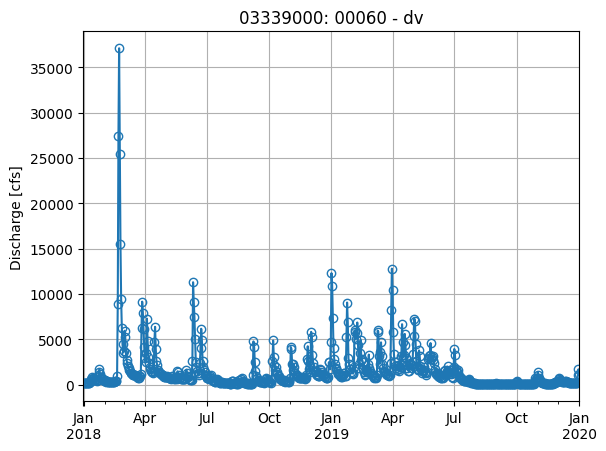

In [111]:
ax = df['00060_Mean'].plot(marker='o', markerfacecolor='none', grid=True)
_ = ax.set_ylabel('Discharge [cfs]')
_ = ax.set_xlabel('')
_ = ax.set_title(f'{site}: {parameterCd} - {service}')